<a href="https://colab.research.google.com/github/jaekyoungkim/tensor2ml_NLP/blob/main/%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%99%80_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EC%9C%BC%EB%A1%9C_%EC%8B%9C%EC%9E%91%ED%95%98%EB%8A%94_%EC%9E%90%EC%97%B0%EC%96%B4%EC%B2%98%EB%A6%AC(ch6).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ch 6 챗봇 만들기
# 텍스트 생성 
# 챗봇 제작 방법은 매우 다양 : 규칙 기반으로 제작, 머신러닝을 활용한 유사도 기반, 규칙과 머신러닝을 섞은 하이브리드형, 시나리오 기반 등 다양함
# 여기서는 딥러닝 기반한 챗봇을 수행하고자 함
# seq2seq 모델 기반의 챗봇

In [ ]:
# 공개된 챗봇을 위한 한글 데이터는 거의 없다고 봐도 무방함. chatbot_data_for_korea v1.0 있긴함
# ubuntu   dialogue corpus 를 제외하면 영어 데이터도 없다고 볼 수 있음
# https://github.com/songys/Chatbot

!git clone https://github.com/songys/Chatbot

fatal: destination path 'Chatbot' already exists and is not an empty directory.


In [3]:
!git clone https://github.com/NLP-kr/tensorflow-ml-nlp-tf2.git

Cloning into 'tensorflow-ml-nlp-tf2'...
remote: Enumerating objects: 1725, done.
remote: Counting objects: 100% (94/94), done.
remote: Compressing objects: 100% (87/87), done.
remote: Total 1725 (delta 48), reused 17 (delta 7), pack-reused 1631
Receiving objects: 100% (1725/1725), 201.21 MiB | 29.24 MiB/s, done.
Resolving deltas: 100% (1038/1038), done.
Checking out files: 100% (88/88), done.


In [4]:
import pandas as pd
DATA_IN_PATH = '/content/'
data = pd.read_csv(DATA_IN_PATH + 'tensorflow-ml-nlp-tf2/6.CHATBOT/data_in/ChatBotData.csv',encoding='utf-8')

In [5]:
data.head(3)
# 데이터 구조는 qa값인 질문과 대답 텍스트를 가지고 있고, 그에 대한 라벨값을 가지고 있음. 
# 0,1,2의 라벨값을 가지고 있음

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0


In [6]:
# 문장 전체에 대한 분석
sentences = list(data['Q']) + list(data['A']) ; sentences

['12시 땡!',
 '1지망 학교 떨어졌어',
 '3박4일 놀러가고 싶다',
 '3박4일 정도 놀러가고 싶다',
 'PPL 심하네',
 'SD카드 망가졌어',
 'SD카드 안돼',
 'SNS 맞팔 왜 안하지ㅠㅠ',
 'SNS 시간낭비인 거 아는데 매일 하는 중',
 'SNS 시간낭비인데 자꾸 보게됨',
 'SNS보면 나만 빼고 다 행복해보여',
 '가끔 궁금해',
 '가끔 뭐하는지 궁금해',
 '가끔은 혼자인게 좋다',
 '가난한 자의 설움',
 '가만 있어도 땀난다',
 '가상화폐 쫄딱 망함',
 '가스불 켜고 나갔어',
 '가스불 켜놓고 나온거 같아',
 '가스비 너무 많이 나왔다.',
 '가스비 비싼데 감기 걸리겠어',
 '가스비 장난 아님',
 '가장 확실한 건 뭘까?',
 '가족 여행 가기로 했어',
 '가족 여행 고고',
 '가족 여행 어디로 가지?',
 '가족 있어?',
 '가족관계 알려 줘',
 '가족끼리 여행간다.',
 '가족들 보고 싶어',
 '가족들이랑 서먹해',
 '가족들이랑 서먹해졌어',
 '가족들이랑 어디 가지?',
 '가족들이랑 여행 갈거야',
 '가족여행 가야지',
 '가족이 누구야?',
 '가족이랑 여행 가려고',
 '가족한테 스트레스 풀었어',
 '가출할까?',
 '가출해도 갈 데가 없어',
 '간만에 떨리니까 좋더라',
 '간만에 쇼핑 중',
 '간만에 휴식 중',
 '간식 뭐 먹을까',
 '간식 추천',
 '간장치킨 시켜야지',
 '간접흡연 싫어',
 '갈까 말까 고민 돼',
 '갈까 말까?',
 '감 말랭이 먹고 싶다.',
 '감 말랭이 먹어야지',
 '감기 같애',
 '감기 걸린 것 같아',
 '감기 기운이 있어',
 '감기 들 거 같애',
 '감기가 오려나',
 '감기약이 없어',
 '감기인거 같애',
 '감미로운 목소리 좋아',
 '감정이 쓰레기통처럼 엉망진창이야',
 '감정컨트롤을 못하겠어',
 '감정컨트롤이 안돼',
 '감히 나를 무시하는 애가 있어',
 '갑자기 나쁜 생각이 막 들더라',
 '갑자기 눈물 나',

In [14]:
!pip install konlpy

In [8]:
# 문장단위의 길이분석, 단어단위의 길이 분석, 형태소 단위의 길이 분석을 진행함
tokenized_sentences = [s.split() for s in sentences] # 띄어쓰기 기준으로 token을 분류
sent_len_by_token = [len(t) for t in tokenized_sentences]    # 각 토큰의 길이를 구함
sent_len_by_eumjul = [len(s.replace(' ','')) for s in sentences]  # 모든 단어 숫자들을 구함

from konlpy.tag import Twitter, Okt
okt = Okt()
morph_tokenized_senteces = [okt.morphs(s.replace(' ', '')) for s in sentences] # 형태소 단위로 나눔
sent_len_by_morph = [len(t) for t in morph_tokenized_senteces]  # 각 형태소의 길이를 계산


In [9]:
tokenized_sentences

[['12시', '땡!'],
 ['1지망', '학교', '떨어졌어'],
 ['3박4일', '놀러가고', '싶다'],
 ['3박4일', '정도', '놀러가고', '싶다'],
 ['PPL', '심하네'],
 ['SD카드', '망가졌어'],
 ['SD카드', '안돼'],
 ['SNS', '맞팔', '왜', '안하지ㅠㅠ'],
 ['SNS', '시간낭비인', '거', '아는데', '매일', '하는', '중'],
 ['SNS', '시간낭비인데', '자꾸', '보게됨'],
 ['SNS보면', '나만', '빼고', '다', '행복해보여'],
 ['가끔', '궁금해'],
 ['가끔', '뭐하는지', '궁금해'],
 ['가끔은', '혼자인게', '좋다'],
 ['가난한', '자의', '설움'],
 ['가만', '있어도', '땀난다'],
 ['가상화폐', '쫄딱', '망함'],
 ['가스불', '켜고', '나갔어'],
 ['가스불', '켜놓고', '나온거', '같아'],
 ['가스비', '너무', '많이', '나왔다.'],
 ['가스비', '비싼데', '감기', '걸리겠어'],
 ['가스비', '장난', '아님'],
 ['가장', '확실한', '건', '뭘까?'],
 ['가족', '여행', '가기로', '했어'],
 ['가족', '여행', '고고'],
 ['가족', '여행', '어디로', '가지?'],
 ['가족', '있어?'],
 ['가족관계', '알려', '줘'],
 ['가족끼리', '여행간다.'],
 ['가족들', '보고', '싶어'],
 ['가족들이랑', '서먹해'],
 ['가족들이랑', '서먹해졌어'],
 ['가족들이랑', '어디', '가지?'],
 ['가족들이랑', '여행', '갈거야'],
 ['가족여행', '가야지'],
 ['가족이', '누구야?'],
 ['가족이랑', '여행', '가려고'],
 ['가족한테', '스트레스', '풀었어'],
 ['가출할까?'],
 ['가출해도', '갈', '데가', '없어'],
 ['간만에', '떨리니까', '좋더라'],
 ['간만에'

In [10]:
sent_len_by_token

[2,
 3,
 3,
 4,
 2,
 2,
 2,
 4,
 7,
 4,
 5,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 3,
 4,
 4,
 3,
 4,
 2,
 3,
 2,
 3,
 2,
 2,
 3,
 3,
 2,
 2,
 3,
 3,
 1,
 4,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 4,
 2,
 4,
 3,
 2,
 4,
 3,
 4,
 2,
 2,
 2,
 3,
 3,
 2,
 2,
 5,
 5,
 3,
 3,
 6,
 4,
 3,
 5,
 4,
 2,
 3,
 4,
 4,
 6,
 4,
 5,
 4,
 8,
 2,
 4,
 1,
 1,
 2,
 2,
 2,
 3,
 2,
 1,
 4,
 4,
 4,
 1,
 1,
 2,
 3,
 4,
 5,
 5,
 1,
 2,
 5,
 3,
 3,
 3,
 5,
 2,
 3,
 2,
 2,
 2,
 4,
 4,
 2,
 5,
 2,
 2,
 1,
 2,
 1,
 3,
 5,
 1,
 3,
 4,
 4,
 5,
 2,
 2,
 3,
 2,
 3,
 3,
 2,
 4,
 3,
 2,
 3,
 4,
 2,
 5,
 3,
 4,
 3,
 2,
 2,
 3,
 3,
 3,
 5,
 3,
 7,
 4,
 4,
 4,
 4,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 3,
 3,
 4,
 3,
 3,
 4,
 5,
 3,
 3,
 3,
 3,
 2,
 3,
 4,
 4,
 3,
 2,
 3,
 2,
 3,
 4,
 2,
 3,
 3,
 3,
 2,
 3,
 3,
 4,
 3,
 3,
 6,
 3,
 1,
 3,
 3,
 2,
 2,
 3,
 2,
 2,
 3,
 3,
 4,
 5,
 3,
 2,
 2,
 3,
 2,
 2,
 3,
 4,
 3,
 3,
 4,
 3,
 3,
 5,
 3,
 6,
 5,
 2,
 2,
 3,
 3,
 2,
 3,
 3,
 3,
 2,
 3,
 1,
 3,
 4,
 4,
 2,
 2,
 3,
 2,
 5,
 3,
 3,
 2,


Text(0, 0.5, 'number of sentences')

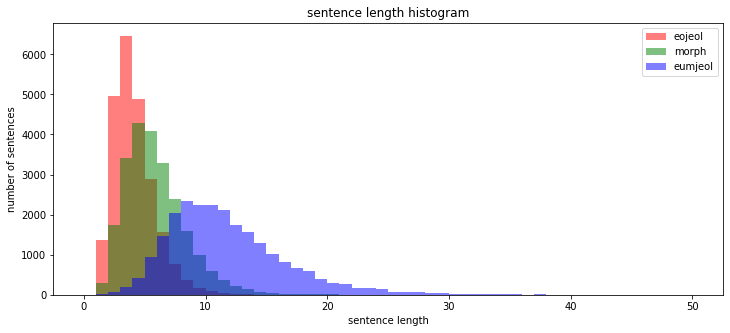

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,5))
plt.hist(sent_len_by_token, bins=50, range=[0,50], alpha=0.5, color='r', label = 'eojeol')
plt.hist(sent_len_by_morph, bins=50, range=[0,50], alpha=0.5, color='g', label = 'morph')
plt.hist(sent_len_by_eumjul, bins=50, range=[0,50], alpha=0.5, color='b', label = 'eumjeol')

plt.legend()

plt.title("sentence length histogram")
plt.xlabel('sentence length')
plt.ylabel('number of sentences')


Text(0, 0.5, 'number of sentences')

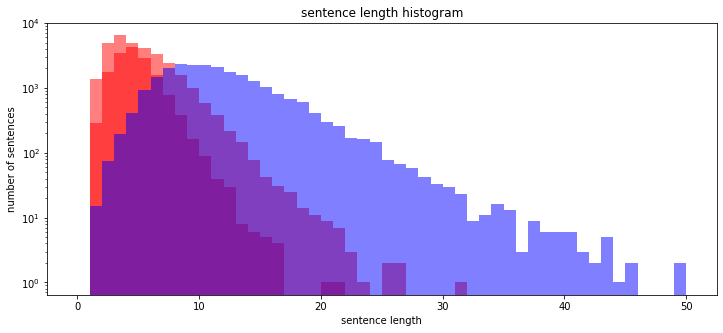

In [12]:
plt.figure(figsize = (12,5))
plt.hist(sent_len_by_token, bins=50, range=[0,50], alpha =0.5 , color ='r' ,label = 'eojeol')
plt.hist(sent_len_by_morph, bins=50, range=[0,50], alpha =0.5 , color ='r' ,label = 'morph')
plt.hist(sent_len_by_eumjul, bins=50, range=[0,50], alpha =0.5 , color ='b' ,label = 'eumjeol')
plt.yscale('log')
plt.title('sentence length histogram')
plt.xlabel('sentence length')
plt.ylabel('number of sentences')

In [13]:
import numpy as np
print('어절최대길이 {}:'.format(np.max(sent_len_by_token)))
print('어절최소길이 {}:'.format(np.min(sent_len_by_token)))
print('어절평균길이 {:.2f}:'.format(np.mean(sent_len_by_token)))  # .2f  두자리수까지만 보여주기

어절최대길이 21:
어절최소길이 1:
어절평균길이 3.64:


{'boxes': [<matplotlib.lines.Line2D at 0x7f4b4970af10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4b4972add0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f4b496be590>,
 'means': [<matplotlib.lines.Line2D at 0x7f4b496b5e10>,
 'medians': [<matplotlib.lines.Line2D at 0x7f4b496b5b10>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f4b4972a590>,
  <matplotlib.lines.Line2D at 0x7f4b496d6dd0>]}

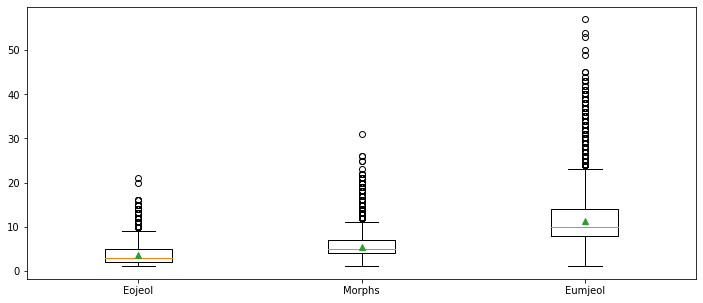

In [26]:
plt.figure(figsize =(12,5))
plt.boxplot([sent_len_by_token, sent_len_by_morph, sent_len_by_eumjul], labels = ['Eojeol','Morphs','Eumjeol'], showmeans=True)
# 긴꼬리 형태의 박스플롯이 생성되

In [16]:
# 질문 답변에 각각에 대한 문장 길이 분포 분석
query_sentences = list(data['Q']) ; query_sentences
answer_sentences = list(data['A'])
query_morph_tokenized_sentences = [okt.morphs(s.replace(' ','')) for s in query_sentences]
query_sent_len_by_morph = [len(t) for t in query_morph_tokenized_sentences]



In [17]:
answer_morph_tokenized_senteces = [okt.morphs(s.replace(' ','')) for s in answer_sentences]
answer_sent_len_by_morph = [len(t) for t in answer_morph_tokenized_senteces]

Text(0, 0.5, 'number of queries')

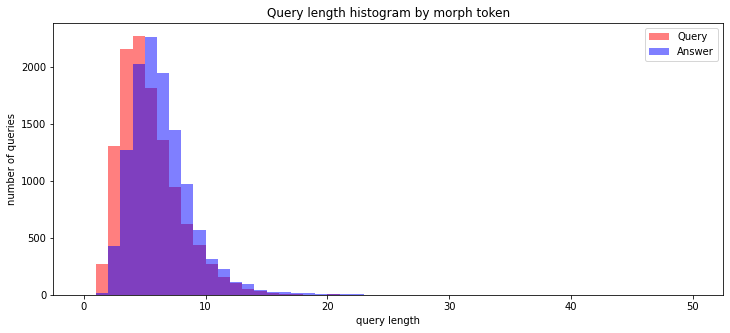

In [33]:
plt.figure(figsize = (12,5))
plt.hist(query_sent_len_by_morph, bins=50, range=[0,50], alpha =0.5 , color ='r' ,label = 'Query')
plt.hist(answer_sent_len_by_morph, bins=50, range=[0,50], alpha =0.5 , color ='b' ,label = 'Answer')

plt.legend()

plt.title('Query length histogram by morph token')
plt.xlabel('query length')
plt.ylabel('number of queries')
# 질문 길이가 응답문장보다 상대적으로 짧은것을 확인

Text(0, 0.5, 'number of queries')

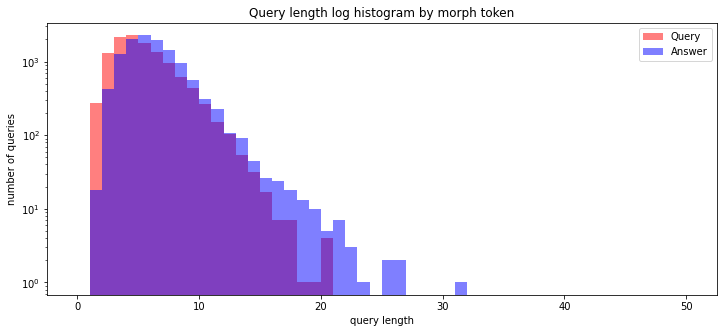

In [34]:
plt.figure(figsize = (12,5))
plt.hist(query_sent_len_by_morph, bins=50, range=[0,50], alpha =0.5 , color ='r' ,label = 'Query')
plt.hist(answer_sent_len_by_morph, bins=50, range=[0,50], alpha =0.5 , color ='b' ,label = 'Answer')

plt.legend()
plt.yscale('log', nonposy='clip')

plt.title('Query length log histogram by morph token')
plt.xlabel('query length')
plt.ylabel('number of queries')
# 답변 데이터가 질문 데이터보다 좀더 이상치 값이 많은것을 확인
# 문장길이를 25로 설정함

{'boxes': [<matplotlib.lines.Line2D at 0x7f4b48466910>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4b48463590>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f4b48469d90>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f4b48469290>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f4b48466e50>,
  <matplotlib.lines.Line2D at 0x7f4b48455a50>]}

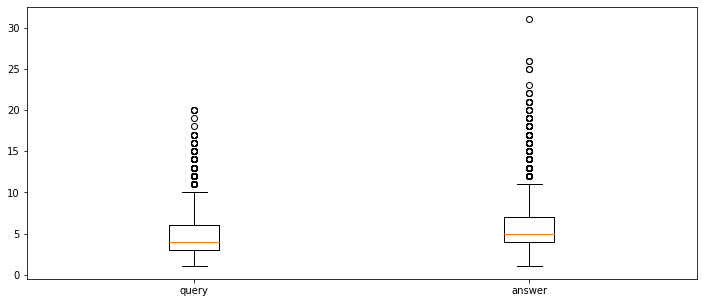

In [35]:
plt.figure(figsize = (12,5))
plt.boxplot([query_sent_len_by_morph, answer_sent_len_by_morph], labels = ['query','answer'])

In [15]:
# 데이터 어휘 빈도 분석, konlpy의 pos-tagging
okt.pos('오늘밤은유난히덥구나')

[('오늘밤', 'Noun'), ('은', 'Josa'), ('유난히', 'Adverb'), ('덥구나', 'Adjective')]

In [18]:
query_NVA_token_sentence = list() # noun, verb, adjective 
answer_NVA_token_sentence = list()
for s in query_sentences:
  for token, tag in okt.pos(s.replace(' ','')):
    if tag =='Noun' or tag=='Verb' or tag=='Adjective':
      query_NVA_token_sentence.append(token)

for s in answer_sentences:
  temp_token_bucket = list()
  for token, tag in okt.pos(s.replace(' ','')):
    if tag =='Noun' or  tag=='Verb' or tag=='Adjective':
      answer_NVA_token_sentence.append(token)
query_NVA_token_sentence = ' '.join(query_NVA_token_sentence)  # 하나로 합치는 과정임 - sentence에 nva만 남아있는 문장이 완성됨
answer_NVA_token_sentence = ' '.join(answer_NVA_token_sentence)

In [19]:
query_NVA_token_sentence

'지망 학교 떨어졌어 박 박 심하네 카드 망가졌어 카드 돼 맞팔 왜 안하지 시간 낭비 아는데 매일 중 시간 낭비 자꾸 보게 됨 보면나만 빼고다 행복해 보여 가끔 궁금해 가끔 뭐 하는지 궁금해 가끔 혼자 좋다 가난한 자의 설움 가만있어도 땀 가상 화폐 쫄 망함 가스 불 켜고 나갔어 가스 불 켜놓고 나온거 같아 가스 비 나왔다 가스 비비 싼데 감기 걸리겠어 가스 비장 아님 가장 확실한건 뭘 까 가족 여행 가기 했어 가족 여행 고고 가족 여행 어디 가지 가족 있어 가족 관계 알려줘 가족 끼리 여행 간다 가족 보고싶어 가족 서먹해 가족 서먹해졌어 가족 어디가 가족 여행 갈거야 가족 여행 가야 가족 누구 가족 여행가 려고 가족 스트레스 풀었어 가출 할까 가출 해도 갈데가 없어 간만 떨리니까 좋더라 간만 쇼핑 간만 휴식 간식 뭐 먹을까 간식 추천 간장 치킨 시켜야지 간접흡연 싫어 고민 돼 감 말랭이 먹고싶다 감 말랭이 먹어야지 감기 같 애 감기 걸린것 같아 감기 기운이있어 감기 들거 같 애 감기가오려나 감기 약 없어 감기 같 애 감미로운 목소리 좋아 감정 쓰레기통 엉망 진창 감정 컨트롤 하겠어 감정 컨트롤 이안 돼 감히 나를 무시 애가 있어 갑자기 나쁜 생각 막 들더라 갑자기 눈물나 갑자기 물어봐서 당황 했어 갑자기 불편한 사이 된거 같아 강렬한 첫인상 남겨야하는데 강아지 키우고싶어 강아지 키우고싶은데 역시안 돼겠지 강아지 키울수있을까 강아지 키울까 강원도 가서 살까 게임 자고 해도되 나 놀러 갈 친구 없어 먹었는데 나 살찐거 같아 수영장 가기 했어 같이있으면 힘든데 붙잡고싶어 피씨 방가 해볼까 할수있는 취미 생활 뭐 있을까 개강 입어볼까 개강 옷 예쁘게 입어볼까 개강 개강 개 같은 상황 개 되 버렸어 개 기름 꼈어 개념 놓고 옴 개념 없어 개 당황 개 당황 했잖아 갑자기 물어봐서 개인 업무 다시 켜 개인 일도 시켜 개 졸려 개 좋아 개학 좋다 무 싫다 걔 누굴 닮아서 그런거니 걔 같은 반 됐으면 좋겠다 거지같 이일해 놓고 갔어 거지 됐어 거짓말 했어 거짓말 나도 모르게

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot  as plt

query_wordcloud = WordCloud(font_path = '/content/NanumGothicLight.ttf').generate(query_NVA_token_sentence)

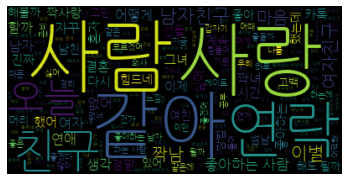

In [25]:
plt.imshow(query_wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

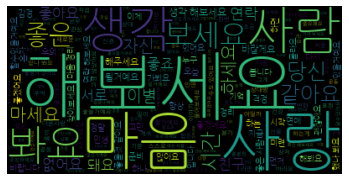

In [26]:
#답변 데이터도 동일하게 워드클라우드를 그려서 살펴보기
answer_wordcloud = WordCloud(font_path = '/content/NanumGothicLight.ttf').generate(answer_NVA_token_sentence)
plt.imshow(answer_wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [27]:
# seq2seq 모델로 챗봇 만들기
# 기계번역, 이미지 설명, 텍스트 오약등 다양한 분야에서 활용되고 있음
# rnn을 기반으로 하며, 인코더와 디코더로 구성됨
# 모델 구현(파이썬 파일+주피터 노트북 파일)



In [28]:
############ preprocess.py 파일 만들기 ###############
import os
import re
import json
import numpy as np
import pandas as pd
from tqdm import tqdm
from konlpy.tag import Okt


In [73]:
FILTER = "([~.,!?\"':;)(])"
PAD = "<PAD>"  # 어떤 의미도 없는 패딩 토큰
STD = "<SOS>"  # 시작토큰
END = "<END>"  # 마지막 토큰
UNK = "<UNK>"  # 사전에 없는 단어
PAD_INDEX = 0
STD_INDEX = 1
END_INDEX = 2
UNK_INDEX = 3
MARKER = [PAD,STD, END, UNK]
CHANGE_FILTER = re.compile(FILTER)
MAX_SEQUENCE = 25

In [99]:
def load_data(path):
  data_df = pd.read_csv(path, header=0)
  question, answer =list(data_df['Q']) , list(data_df['A'])
  return question, answer # question 과  answer 데이터를 불러옴


In [75]:
def data_tokenizer(data):
  words = []
  for sentence in data:
    sentence = re.sub(CHANGE_FILTER, "",sentence) # filter에 해당되는것들을ㄹ 다 지우기
    for word in sentence.split(): # 문장을 빈칸기준으로 word로 쪼개서 words 에 넣기
      words.append(word)
  return [word for word in words if word]
# 전체 데이터의 모든 단어를 포함하는 단어 리스트 만들기


In [76]:
# 형태소로 분리하는 함수
def prepro_like_morphlized(data):
  morph_analyzer =Okt()
  result_data = list()
  for seq in tqdm(data):
    morphlized_seq = " ".join(morph_analyzer.morphs(seq.replace(' ','')))
    result_data.append(morphlized_seq)
  return result_data

In [77]:
# 단어 사전을 만드는 함수 정의 
def load_vocabulary(path, vocab_path, tokenize_as_morph =False):
  vocabulary_list = []
  if not os.path.exists(vocab_path):  # 단어사전 파일이 있다면 불러와서 사용, 디렉토리 있는지 확인
    if (os.path.exists(path)):   # 디렉토리 있는지 확인
      data_df = pd.read_csv(path, encoding= 'utf-8') # 파일 읽기
      question, answer = list(data_df['Q']), list(data_df['A']) 
      if tokenize_as_morph:  # tokenize_as_morph =True 인경우
        question = prepro_like_morphlized(question)  # question 형태소로 분리
        answer = prepro_like_morphlized(answer) # answer 형태소로 분리

      data = []
      data.extend(question) # data에 question 넣기
      data.extend(answer)  # data에 answer 넣기
      words = data_tokenizer(data) # data에 넣은 것들을 토크나이저로 월드로 만들기
      words = list(set(words)) # set 형태로 만들기, 중복이 제거가됨
      words[:0] = MARKER

    with open(vocab_path, 'w', encoding = 'utf-8') as vocabulary_file:  # 저장하기
      for word in words:
        vocabulary_file.write(word+'\n')


  with open(vocab_path, 'r', encoding='utf-8') as vocabulary_file:
    for line in vocabulary_file:
      vocabulary_list.append(line.strip())
  word2idx, idx2word = make_vocabulary(vocabulary_list)

  return word2idx, idx2word, len(word2idx)



In [78]:
def make_vocabulary(vocabulary_list):  # 단어 리스트를 인자로 받는다. 이 리스트를 활용해 두개의 딕셔너리를 만들기
  # 리스트를 키가ㅏ 단어이고 값이 인덱스 딕셔너리를 만든다.
  word2idx = {word : idx for idx, word in enumerate(vocabulary_list)}
  # 리스트를 키가 인덱스이고 값이 단어인 딕셔너리를 만든다.
  idx2word = {idx : word for idx, word in enumerate(vocabulary_list)}

  return word2idx, idx2word

In [86]:
PATH = '/content/tensorflow-ml-nlp-tf2/6.CHATBOT/data_in/ChatBotData.csv'
VOCAB_PATH = '/content/tensorflow-ml-nlp-tf2/6.CHATBOT/data_in/vocabulary.txt' # 
word2idx, idx2word, vocab_size = load_vocabulary(PATH, VOCAB_PATH)

In [87]:
word2idx


{'<PAD>': 0,
 '<SOS>': 1,
 '<END>': 2,
 '<UNK>': 3,
 '잊게': 4,
 '애틋한': 5,
 '약을': 6,
 '재취직': 7,
 '왕따된': 8,
 '하겠네요': 9,
 '먹었니': 10,
 '생겼나': 11,
 '조금의': 12,
 '맞는건가보네': 13,
 '끝낼까': 14,
 '잠수': 15,
 '데이트했는데': 16,
 '깊어져': 17,
 '허례허식이에요': 18,
 '포기한': 19,
 '롱디인데': 20,
 '서먹해졌어': 21,
 '엿같다': 22,
 '좋아하던': 23,
 '말았으면': 24,
 '밥먹자': 25,
 '어플은': 26,
 '희미해져': 27,
 '원망': 28,
 '바라요': 29,
 '떠나보내고': 30,
 '초과': 31,
 '미친거': 32,
 '넘었는데도': 33,
 '꺼려질': 34,
 '매듭문자를': 35,
 '나지': 36,
 '식상한': 37,
 '찾아서': 38,
 '저렴하게': 39,
 '타는': 40,
 '마음껏': 41,
 '길다면': 42,
 '끝났습니다': 43,
 '잊고싶다': 44,
 '무료': 45,
 '남자의심리': 46,
 '식욕폭발': 47,
 '가슴은': 48,
 '이별후': 49,
 '귀엽다고': 50,
 '못하는거': 51,
 '싸옴': 52,
 '일요일날': 53,
 '칭찬해주세요': 54,
 '라면봉지': 55,
 '그립다고': 56,
 '커지는': 57,
 '애야': 58,
 '사는데요': 59,
 '성이': 60,
 '진실을': 61,
 '진심이였을까': 62,
 '태그된': 63,
 '연락이었으면': 64,
 '대한': 65,
 '악연이니': 66,
 '됬네': 67,
 '증상이에요': 68,
 '선택하셨네요': 69,
 '모르겠다고': 70,
 '아쉬움': 71,
 '준비도': 72,
 '있을것': 73,
 '꽃나무라도': 74,
 '크리스마스가': 75,
 '어플': 76,
 '걱정하지': 77,
 '돌아왔네': 78,
 '떨어져야할'

In [84]:
idx2word

{0: '<PAD>',
 1: '<SOS>',
 2: '<END>',
 3: '<UNK>',
 4: '잊게',
 5: '애틋한',
 6: '약을',
 7: '재취직',
 8: '왕따된',
 9: '하겠네요',
 10: '먹었니',
 11: '생겼나',
 12: '조금의',
 13: '맞는건가보네',
 14: '끝낼까',
 15: '잠수',
 16: '데이트했는데',
 17: '깊어져',
 18: '허례허식이에요',
 19: '포기한',
 20: '롱디인데',
 21: '서먹해졌어',
 22: '엿같다',
 23: '좋아하던',
 24: '말았으면',
 25: '밥먹자',
 26: '어플은',
 27: '희미해져',
 28: '원망',
 29: '바라요',
 30: '떠나보내고',
 31: '초과',
 32: '미친거',
 33: '넘었는데도',
 34: '꺼려질',
 35: '매듭문자를',
 36: '나지',
 37: '식상한',
 38: '찾아서',
 39: '저렴하게',
 40: '타는',
 41: '마음껏',
 42: '길다면',
 43: '끝났습니다',
 44: '잊고싶다',
 45: '무료',
 46: '남자의심리',
 47: '식욕폭발',
 48: '가슴은',
 49: '이별후',
 50: '귀엽다고',
 51: '못하는거',
 52: '싸옴',
 53: '일요일날',
 54: '칭찬해주세요',
 55: '라면봉지',
 56: '그립다고',
 57: '커지는',
 58: '애야',
 59: '사는데요',
 60: '성이',
 61: '진실을',
 62: '진심이였을까',
 63: '태그된',
 64: '연락이었으면',
 65: '대한',
 66: '악연이니',
 67: '됬네',
 68: '증상이에요',
 69: '선택하셨네요',
 70: '모르겠다고',
 71: '아쉬움',
 72: '준비도',
 73: '있을것',
 74: '꽃나무라도',
 75: '크리스마스가',
 76: '어플',
 77: '걱정하지',
 78: '돌아왔네',
 79: '떨어

In [85]:
vocab_size 

20705

In [109]:
# 인코더에 들어갈 입력값을 전처리 하는 과정

def enc_processing(value, dictionary, tokenize_as_morph=False): # 2개의 인자를 받음, 하나는 전처리할 데이터이고, 나머지 하나는 단어 사전
  sequences_input_index = []
  sequences_length = []
  if tokenize_as_morph :
    value = prepro_like_morphlized(value)
  for sequence in value:
    sequence =re.sub(CHANGE_FILTER, "", sequence)  #필터링
    sequence_index = [] # INDEX 를 새로 메길예정
    for  word in sequence.split(): # sequence 를 빈칸기준으로 쪼개서 word에 할당
      if dictionary.get(word) is not None: # 사전에 있으면
        sequence_index.extend([dictionary[word]])
      else :# 사전에 없으면
        sequence_index.append([dictionary[UNK]]) 
    if len(sequence_index) > MAX_SEQUENCE: # max_squence 보다 길이가 긴경우
      sequence_index = sequence_index[:MAX_SEQUENCE]

    # 패딩을 주는 과정
    sequences_length.append(len(sequence_index))
    sequence_index += (MAX_SEQUENCE - len(sequence_index)) * [dictionary[PAD]]  
    sequences_input_index.append(sequence_index)

  return np.asarray(sequences_input_index), sequences_length


In [133]:
# 디코더 입력값과 타깃값
# 디코더 입력 : <SOS> 그래 오랜만이야 <PAD> 
# 디코더 타겟 : 그래 오랜만이야 <END> <PAD>
# 구조는 인코더의 입력값을 만든느 전처리 함수왇 ㅗㅇ일
def dec_output_processing(value, dictionary, tokenize_as_morph=False):
  sequences_output_index = []
  sequences_length = []
  if tokenize_as_morph:# true 인경우에는 형태소로처리하기 아닌경우에는 그냥 사용
    value = prepro_like_morphlized(value) 
  for sequence in value:
    sequence = re.sub(CHANGE_FILTER, "", sequence) # 필터링적용해서 구두점등 삭제
    sequence_index = [] 
    sequence_index = [dictionary[STD] + dictionary[word] if word in dictionary else dictionary[UNK] for word in sequence.split() ] # 시작 토큰 + 필요, 없는 단어는 unk로 바꿈
    
    if len(sequence_index) > MAX_SEQUENCE : # 글자 길이에 맞게 padding or 잘라내기
      sequence_index = sequence_index[:MAX_SEQUENCE]
    sequences_length.append(len(sequence_index))
    sequence_index += (MAX_SEQUENCE - len(sequence_index)) * [dictionary[PAD]]  # 부족한만큼 pad로 채우기

    sequences_output_index.append(sequence_index)

  return np.asarray(sequences_output_index), sequences_length



In [137]:
def dec_target_processing(value, dictionary, tokenize_as_morph=False):
  sequences_target_index = []
  if tokenize_as_morph:
    value = prepro_like_morphlized(value)
  for sequence in value:
    sequence = re.sub(CHANGE_FILTER, "", sequence)
    sequence_index = [dictionary[word] if word in dictionary else dictionary[UNK] for word in sequence.split()]
    if len(sequence_index) >= MAX_SEQUENCE:
      sequence_index = sequence_index[:MAX_SEQUENCE -1] + [dictionary[END]]
    else:
      sequence_index +=[dictionary[END]]
    
    
    sequence_index += (MAX_SEQUENCE -len(sequence_index)) * [dictionary[PAD]]
    sequences_target_index.append(sequence_index)
  return np.asarray(sequences_target_index)
# 문장이 시작하는 부분에 시작토큰을 넣지 않고, 마지막에 종료 토큰을 넣는다는 점.
# 리턴값이 하나만 있는데, 실제길이를 담고있는 리스트의 경우 여기서는 따로만들지 않음


In [135]:
################# preprocess.ipynb ######################

In [123]:
PATH = '/content/tensorflow-ml-nlp-tf2/6.CHATBOT/data_in/ChatBotData.csv_short'
VOCAB_PATH = '/content/tensorflow-ml-nlp-tf2/6.CHATBOT/data_in/vocabulary.txt' 


In [118]:
inputs, outputs=load_data(PATH) 

In [101]:
inputs

['가끔 궁금해',
 '가끔 뭐하는지 궁금해',
 '가끔은 혼자인게 좋다',
 '가난한 자의 설움',
 '가만 있어도 땀난다',
 '가상화폐 쫄딱 망함',
 '가스불 켜고 나갔어',
 '가스불 켜놓고 나온거 같아',
 '가스비 너무 많이 나왔다.',
 '가스비 비싼데 감기 걸리겠어',
 '남자친구 교회 데려가고 싶어',
 '남자친구 또 운동 갔어',
 '남자친구 생일인데 뭘 줄까',
 '남자친구 승진 선물로 뭐가 좋을까?',
 '남자친구 오늘 따라 훈훈해 보인다',
 '남자친구 오늘 좀 질린다.',
 '남자친구가 나 안 믿어줘',
 '남자친구가 너무 바빠',
 '남자친구가 너무 운동만 해',
 '남자친구가 너무 잘생겼어']

In [102]:
outputs

['그 사람도 그럴 거예요.',
 '그 사람도 그럴 거예요.',
 '혼자를 즐기세요.',
 '돈은 다시 들어올 거예요.',
 '땀을 식혀주세요.',
 '어서 잊고 새출발 하세요.',
 '빨리 집에 돌아가서 끄고 나오세요.',
 '빨리 집에 돌아가서 끄고 나오세요.',
 '다음 달에는 더 절약해봐요.',
 '따뜻하게 사세요!',
 '마음을 열 때까지 설득해보세요.',
 '운동을 함께 해보세요.',
 '평소에 필요한 것 생각해보세요.',
 '평소에 필요했던 게 좋을 것 같아요.',
 '전생에 나라를 구하셨나요.',
 '결단은 빠를수록 좋아요.',
 '거짓말 적당히 하세요.',
 '너무 집착하지 마세요.',
 '운동을 함께 해보세요.',
 '전생에 나라를 구하셨나요.']

In [104]:
char2idx, idx2char, vocab_size = load_vocabulary(PATH, VOCAB_PATH, tokenize_as_morph=False)

In [105]:
vocab_size

20705

In [106]:
char2idx

{'<PAD>': 0,
 '<SOS>': 1,
 '<END>': 2,
 '<UNK>': 3,
 '잊게': 4,
 '애틋한': 5,
 '약을': 6,
 '재취직': 7,
 '왕따된': 8,
 '하겠네요': 9,
 '먹었니': 10,
 '생겼나': 11,
 '조금의': 12,
 '맞는건가보네': 13,
 '끝낼까': 14,
 '잠수': 15,
 '데이트했는데': 16,
 '깊어져': 17,
 '허례허식이에요': 18,
 '포기한': 19,
 '롱디인데': 20,
 '서먹해졌어': 21,
 '엿같다': 22,
 '좋아하던': 23,
 '말았으면': 24,
 '밥먹자': 25,
 '어플은': 26,
 '희미해져': 27,
 '원망': 28,
 '바라요': 29,
 '떠나보내고': 30,
 '초과': 31,
 '미친거': 32,
 '넘었는데도': 33,
 '꺼려질': 34,
 '매듭문자를': 35,
 '나지': 36,
 '식상한': 37,
 '찾아서': 38,
 '저렴하게': 39,
 '타는': 40,
 '마음껏': 41,
 '길다면': 42,
 '끝났습니다': 43,
 '잊고싶다': 44,
 '무료': 45,
 '남자의심리': 46,
 '식욕폭발': 47,
 '가슴은': 48,
 '이별후': 49,
 '귀엽다고': 50,
 '못하는거': 51,
 '싸옴': 52,
 '일요일날': 53,
 '칭찬해주세요': 54,
 '라면봉지': 55,
 '그립다고': 56,
 '커지는': 57,
 '애야': 58,
 '사는데요': 59,
 '성이': 60,
 '진실을': 61,
 '진심이였을까': 62,
 '태그된': 63,
 '연락이었으면': 64,
 '대한': 65,
 '악연이니': 66,
 '됬네': 67,
 '증상이에요': 68,
 '선택하셨네요': 69,
 '모르겠다고': 70,
 '아쉬움': 71,
 '준비도': 72,
 '있을것': 73,
 '꽃나무라도': 74,
 '크리스마스가': 75,
 '어플': 76,
 '걱정하지': 77,
 '돌아왔네': 78,
 '떨어져야할'

In [107]:
idx2char

{0: '<PAD>',
 1: '<SOS>',
 2: '<END>',
 3: '<UNK>',
 4: '잊게',
 5: '애틋한',
 6: '약을',
 7: '재취직',
 8: '왕따된',
 9: '하겠네요',
 10: '먹었니',
 11: '생겼나',
 12: '조금의',
 13: '맞는건가보네',
 14: '끝낼까',
 15: '잠수',
 16: '데이트했는데',
 17: '깊어져',
 18: '허례허식이에요',
 19: '포기한',
 20: '롱디인데',
 21: '서먹해졌어',
 22: '엿같다',
 23: '좋아하던',
 24: '말았으면',
 25: '밥먹자',
 26: '어플은',
 27: '희미해져',
 28: '원망',
 29: '바라요',
 30: '떠나보내고',
 31: '초과',
 32: '미친거',
 33: '넘었는데도',
 34: '꺼려질',
 35: '매듭문자를',
 36: '나지',
 37: '식상한',
 38: '찾아서',
 39: '저렴하게',
 40: '타는',
 41: '마음껏',
 42: '길다면',
 43: '끝났습니다',
 44: '잊고싶다',
 45: '무료',
 46: '남자의심리',
 47: '식욕폭발',
 48: '가슴은',
 49: '이별후',
 50: '귀엽다고',
 51: '못하는거',
 52: '싸옴',
 53: '일요일날',
 54: '칭찬해주세요',
 55: '라면봉지',
 56: '그립다고',
 57: '커지는',
 58: '애야',
 59: '사는데요',
 60: '성이',
 61: '진실을',
 62: '진심이였을까',
 63: '태그된',
 64: '연락이었으면',
 65: '대한',
 66: '악연이니',
 67: '됬네',
 68: '증상이에요',
 69: '선택하셨네요',
 70: '모르겠다고',
 71: '아쉬움',
 72: '준비도',
 73: '있을것',
 74: '꽃나무라도',
 75: '크리스마스가',
 76: '어플',
 77: '걱정하지',
 78: '돌아왔네',
 79: '떨어

In [138]:
index_inputs, input_seq_len = enc_processing(inputs, char2idx, tokenize_as_morph=False)
index_outputs, output_seq_len = dec_output_processing(outputs, char2idx, tokenize_as_morph=False)
index_targets = dec_target_processing(outputs, char2idx, tokenize_as_morph=False)

In [139]:
index_inputs

array([[ 5450,   383,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [ 5450,   583,   383,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [19156,  9218, 10196,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [ 7647, 12660, 14948,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [14169, 17119,  5426,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],


In [140]:
input_seq_len

[2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 4, 4, 3, 4, 3]

In [141]:
index_outputs

array([[ 7506,  8883, 13398,  8506,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [ 7506,  8883, 13398,  8506,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [15518, 19644,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [ 8977,  7734, 11333,  8506,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [10219, 16569,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],


In [142]:
output_seq_len

[4, 4, 2, 4, 2, 4, 5, 5, 4, 2, 4, 3, 4, 6, 3, 3, 3, 3, 3, 3]

In [143]:
index_targets

array([[ 7505,  8882, 13397,  8505,     2,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [ 7505,  8882, 13397,  8505,     2,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [15517, 19643,     2,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [ 8976,  7733, 11332,  8505,     2,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [10218, 16568,     2,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],


In [146]:
data_configs ={}
data_configs['char2idx'] = char2idx
data_configs['idx2char'] = idx2char
data_configs['vocab_size'] = vocab_size
data_configs['pad_symbol'] = PAD
data_configs['std_symbol'] = STD
data_configs['end_symbol'] = END
data_configs['unk_symbol'] = UNK
data_configs

{'char2idx': {'<PAD>': 0,
  '<SOS>': 1,
  '<END>': 2,
  '<UNK>': 3,
  '잊게': 4,
  '애틋한': 5,
  '약을': 6,
  '재취직': 7,
  '왕따된': 8,
  '하겠네요': 9,
  '먹었니': 10,
  '생겼나': 11,
  '조금의': 12,
  '맞는건가보네': 13,
  '끝낼까': 14,
  '잠수': 15,
  '데이트했는데': 16,
  '깊어져': 17,
  '허례허식이에요': 18,
  '포기한': 19,
  '롱디인데': 20,
  '서먹해졌어': 21,
  '엿같다': 22,
  '좋아하던': 23,
  '말았으면': 24,
  '밥먹자': 25,
  '어플은': 26,
  '희미해져': 27,
  '원망': 28,
  '바라요': 29,
  '떠나보내고': 30,
  '초과': 31,
  '미친거': 32,
  '넘었는데도': 33,
  '꺼려질': 34,
  '매듭문자를': 35,
  '나지': 36,
  '식상한': 37,
  '찾아서': 38,
  '저렴하게': 39,
  '타는': 40,
  '마음껏': 41,
  '길다면': 42,
  '끝났습니다': 43,
  '잊고싶다': 44,
  '무료': 45,
  '남자의심리': 46,
  '식욕폭발': 47,
  '가슴은': 48,
  '이별후': 49,
  '귀엽다고': 50,
  '못하는거': 51,
  '싸옴': 52,
  '일요일날': 53,
  '칭찬해주세요': 54,
  '라면봉지': 55,
  '그립다고': 56,
  '커지는': 57,
  '애야': 58,
  '사는데요': 59,
  '성이': 60,
  '진실을': 61,
  '진심이였을까': 62,
  '태그된': 63,
  '연락이었으면': 64,
  '대한': 65,
  '악연이니': 66,
  '됬네': 67,
  '증상이에요': 68,
  '선택하셨네요': 69,
  '모르겠다고': 70,
  '아쉬움': 71,
  '준비도': 72,
 

In [151]:
DATA_IN_PATH= '/content'
TRAIN_INPUTS = '/train_inputs.npy'
TRAIN_OUTPUTS = '/train_outputs.npy'
TRAIN_TARGETS = '/train_targets.npy'
DATA_CONFIGS = '/data_configs.json'

np.save(open(DATA_IN_PATH + TRAIN_INPUTS , 'wb'), index_inputs)
np.save(open(DATA_IN_PATH + TRAIN_OUTPUTS , 'wb'), index_outputs)
np.save(open(DATA_IN_PATH + TRAIN_TARGETS , 'wb'), index_targets)

json.dump(data_configs, open(DATA_IN_PATH + DATA_CONFIGS, 'w'))

# 파일이 생성된것을 확인 할 수 있음

In [152]:
import tensorflow as tf

SEED_NUM =1234
tf.random.set_seed(SEED_NUM)

In [153]:
index_inputs = np.load(open(DATA_IN_PATH + TRAIN_INPUTS, 'rb'))
index_outputs = np.load(open(DATA_IN_PATH + TRAIN_OUTPUTS , 'rb'))
index_targets = np.load(open(DATA_IN_PATH + TRAIN_TARGETS , 'rb'))
prepro_configs = json.load(open(DATA_IN_PATH + DATA_CONFIGS , 'r'))

In [154]:
print(len(index_inputs)),print(len(index_outputs)), print(len(index_targets))

20
20
20


(None, None, None)

In [155]:
index_inputs

array([[ 5450,   383,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [ 5450,   583,   383,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [19156,  9218, 10196,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [ 7647, 12660, 14948,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [14169, 17119,  5426,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],


In [157]:
MODEL_NAME = 'seq2seq_kor'
BATCH_SIZE = 2
MAX_SEQUENCE = 25
EPOCH =50
UNITS = 1024
EMBEDDING_DIM = 256
VALIDATION_SPLIT = 0.1
char2idx = prepro_configs['char2idx']
idx2char = prepro_configs['idx2char']
std_index = prepro_configs['std_symbol']
end_index = prepro_configs['end_symbol']
vocab_size = prepro_configs['vocab_size']


In [160]:
# seq2seq 모델의 인코더 파트
class Encoder(tf.keras.layers.Layer):  # layer 를 상속받고있음
  def __init__(self,vocab_size, embedding_dim, enc_units, batch_sz): # 인자: 배치사이즈, 재귀신경망과 결과 차원, 사전크기, 임베딩 차원
    super(Encoder, self).__init__()
    self.batch_sz = batch_sz
    self.enc_units = enc_units
    self.vocab_size = vocab_size
    self.embedding_dim = embedding_dim

    self.embedding = tf.keras.layers.Embedding(self.vocab_size, self.embedding_dim) 
    self.gru = tf.keras.layers.GRU(self.enc_units, return_sequences = True, return_state = True, recurrent_initializer = 'glorot_uniform')
    # enc_units : gru의 결과차원,  return_sequences :  각 시퀀스마다 출력을 반환할지여부, return_state : 마지막 상태값의 반환여부 recurrent_initializer : 초깃값을 무엇으로 할것인지 설정 
    # glorao_uniform (xavier초기화라고도 불림) 초기화 방법ㅂ, 이전노드와 다음 노드의 개수에 의존하는 방법

  def call(self, x, hidden): # x, hidden -> embedding함수를 통해 x값을 임베딩 벡터로 만든다. .
    x = self.embedding(x)  # 임베딩먼저
    output, state = self.gur(x, initial_state = hidden) # gru모델에 넣음
    return output, state # 결괏값으로 시퀀스의 출력값과 마지막 상태값을 리턴한다
  def initilize_hidden_state(self, inp):  # 배치크기를 받아 순환신경망에 초기에 사용될 크기의 은닉상태를 만드는 연할을 한다
    return tf.zeros((tf.shape(inp)[0], self.enc_units))

In [166]:
class BahdannauAttention(tf.keras.layers.Layer): 
  def __init__(self, units):# 출력 벡터의 크기를 인자로 받음 
    super(BahdannauAttention, self).__init__()
    self.W1 = tf.keras.layers.Dense(units)
    self.W2 = tf.keras.layers.Dense(units)  
    self.V = tf.keras.layers.Dense(1)  # fully connected
    
  def call(self, query, values): # query : 은닉층의 상태값,  values : 인코더 재귀 순환망의 결괏값
    hidden_with_time_axis = tf.expand_dims(query, 1)
    score =self.V(tf.nn.tanh(self.W1(values) + self.W2(hidden_with_time_axis))) 
    attention_weights = tf.nn.softmax(score, axis = 1)  # 중요도가 0~1사이의 값으로 나오게됨
    context_vector = attnetion_weights * values # 1차원의 벡터가 나오게됨
    context_vector = tf.reduce_sum(context_vector, axis=1)

    return context_vector , attention_weights

# 인코더 순환 신경망의 결괏값을 어텐션 방법을 적용해 가중치를 계산해서 가중치가 적용된 새로운 인코더 순환신경망의 결괏값을 만들어내서 디코더에 전달
# 이때 만들어진 attention 클래스에 포함된  w1,w2,v는 학습을 통해 값들이 최적화 되며 기존 seq2seq의 문제를 해결하는 방법론이 적영됨

In [ ]:
# seq2seq 모델의 디코더 파트


In [168]:
# seq2seq 디코더
class Decoder(tf.keras.layers.Layer):
  def __init__(self, vocab_size, embedding_dim, dec_units, batch_sz):
    super(Decoder, self).__init__()
    self.batch_sz = batch_sz
    self.dec_units = dec_units
    self.vocab_size = vocab_size
    self.embedding_dim = embedding_dim
    self.embedding = tf.kears.layers.Embedding(self.vocab_size,)
    self.gru = tf.keras.layers.GRU(self.dec_units, return_sequences= True, return_state=True, recurrent_initializer = 'glorot_uniform')
    self.fc = tf.keras.layers.Dense(self.vocab_size)
    self.attention = BahdannauAttention(self.dec_units)
  
  def call(self, x, hidden, enc_output):
    context_vector, attention_weights = self.attention(hidden, enc_output)
    x = self.embedding(x)
    x = tf.concat([tf.expand_dims(context_vector,1),x], axis=1)
    output, state = self.gru()
    output = tf.reshape(output, (-1, output.shape[2]))
    x = self.fc(output)
    return x, state, attention_weights

<tf.Tensor: shape=(0,), dtype=int32, numpy=array([], dtype=int32)>